In [2]:
import argparse
import treegp
import numpy as np
import pandas as pd
import pickle
from datetime import datetime
from sklearn.gaussian_process.kernels import Kernel
import os
import treecorr

# plotting things
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

def initSeeds():
    seeds = list(range(6,11))+[22,23,25,26,27]+list(range(30,40))
    seeds +=list(range(42,54))+list(range(55,61))+list(range(62,90))
    seeds += list(range(90,171))
    return seeds

def comp_2pcf_treecorr(x, y, k, bin_type='TwoD'):
    """calculate 2pcf for scalar k"""
    cat = treecorr.Catalog(x=x, y=y, k=k, w=None)
    kk = treecorr.KKCorrelation(min_sep=0, max_sep=0.15, nbins=17,
                                bin_type=bin_type, bin_slop=0)
    kk.process(cat)
    return kk.xi

def raw_moments(im, ordx=1, ordy=1):
    """calculate raw moment of image"""
    posY, posX = np.indices(im.shape)
    posY = np.flipud(posY)
    
    rmom = sum(sum(im*posX**ordx*posY**ordy))
    return rmom

def centroids(im):
    """find the centroids of the image"""
    M10 = raw_moments(im, ordx=1, ordy=0)
    M00 = raw_moments(im, ordx=0, ordy=0)
    M01 = raw_moments(im, ordx=0, ordy=1)
    xbar = M10/M00
    ybar = M01/M00
    return xbar, ybar

def get_theta(g1, g2):
    """find angle from acrtan2 given x and y"""
    # this give theta in degrees
    phi = np.arctan2(g2,g1)*180/np.pi
    if g1*g2> 0:
        #first, quadrant
        if g1 > 0:
            phi = phi
        #third quadrant
        else: 
            phi = phi+360
    # second quadrant
    elif g1 < 0 and g2 > 0:
        phi = phi
    # fouth quadrant
    elif g1 > 0 and g2 < 0:
        phi = phi+360 
    theta = phi/2
    return theta

def get_orient(im):
    """calculate angle of image from moments"""
    xbar, ybar = centroids(im)
    M20 = raw_moments(im, ordx=2, ordy=0)
    M00 = raw_moments(im, ordx=0, ordy=0)
    M02 = raw_moments(im, ordx=0, ordy=2)
    M11 = raw_moments(im, ordx=1, ordy=1)
    
    mu20p = M20/M00 - xbar**2
    mu02p = M02/M00 - ybar**2
    mu11p = M11/M00 - xbar*ybar
    
    #angle in degrees
    theta = get_theta(mu20p-mu02p,2*mu11p)
    return theta

Text(0.5, 0.98, '2pcf of e1')

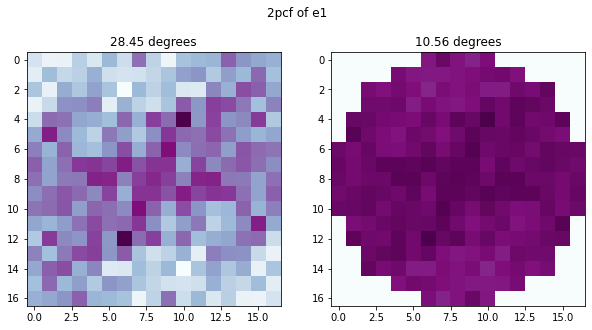

In [3]:
def comp_2pcf_treecorr(x, y, k, bin_type='TwoD'):
    """calculate 2pcf for scalar k"""
    cat = treecorr.Catalog(x=x, y=y, k=k, w=None)
    kk = treecorr.KKCorrelation(min_sep=0, max_sep=0.15, nbins=17,
                                bin_type=bin_type, bin_slop=0)
    kk.process(cat)
    return kk.xi

def circle(im):
    R = im.shape[0]/2
    posY, posX = np.indices(im.shape)
    posX = posX-8
    posY = np.flipud(posY)-8
    incircle = np.argwhere(np.hypot(posX,posY) > R)
    for ind in incircle:
        indX = ind[0]
        indY = ind[1]
        im[indX,indY] = 0
    return im
plt.rcParams['font.size'] = 17
plt.rcParams['axes.labelsize'] = 17
# load data
d = pickle.load(open("..//runsims//sameheightPsfws//outh_psfws_136.pkl", 'rb'))
for k in ['e1', 'e2', 'thx', 'thy', 'sigma']:
    locals()[k] = np.array(d[k])
d_sigma = sigma - np.mean(sigma)
xi_dsigma = comp_2pcf_treecorr(thx, thy, d_sigma)
xi_e1 = comp_2pcf_treecorr(thx, thy, e1)
xi_e2 = comp_2pcf_treecorr(thx, thy, e2)
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax0 = ax[0].imshow(xi_e1, cmap="BuPu")
ax[0].set_title("%.2f degrees" %get_orient(xi_e1))
ax1 = ax[1].imshow(circle(xi_e1), cmap="BuPu")
ax[1].set_title("%.2f degrees" %get_orient(circle(xi_e1)))
fig.suptitle("2pcf of e1")

In [26]:
def raw_moments(im, ordx=1, ordy=1):
    """calculate raw moment of image"""
    posY, posX = np.indices(im.shape)
    posY = np.flipud(posY)
    
    rmom = sum(sum(im*posX**ordx*posY**ordy))
    return rmom

raw_moments(xi_e1)

0.5663374236263761

In [27]:
def raw_moments(im, ordx=1, ordy=1):
    """calculate raw moment of image"""
    posY, posX = np.indices(im.shape)
    posY = np.flipud(posY)-8
    posX = posX-8
    
    rmom = sum(sum(im*posX**ordx*posY**ordy))
    return rmom

raw_moments(xi_e1)

0.002931213416572389

In [25]:
d = pickle.load(open("..//runsims//sameheightPsfws//outh_psfws_136.pkl", 'rb'))
for k in ['e1', 'e2', 'thx', 'thy', 'sigma']:
    locals()[k] = np.array(d[k])
d_sigma = sigma - np.mean(sigma)
xi_dsigma = comp_2pcf_treecorr(thx, thy, d_sigma)
xi_e1 = comp_2pcf_treecorr(thx, thy, e1)
xi_e2 = comp_2pcf_treecorr(thx, thy, e2)
